In [ ]:
#Practica 2 uso de colab
#Tinoco Videgaray Sergio Ernesto
#Bioinformatics
#14/03/24

In [ ]:
#Leer archivo PDB
def readPDB():
    return open("/content/drive/MyDrive/ESCUELA/Bioinformatics/Practica 2/7fcd.pdb","r").read()

In [ ]:
#Obtener coordenadas de las cadenas A,B y C
def getChainsCoords(pdb):
    import re
    #Get A coords
    A_chain=re.findall("(?<=(ATOM.{17}A.{9})).((\d+.\d+\s+){3})",pdb)
    A_chainCoords=[[float(coord) for coord in a[1].split()] for a in A_chain] #Omitir grupos de la Regex

    #Get B coords
    B_chain=re.findall("(?<=(ATOM.{17}B.{9})).((\d+.\d+\s+){3})",pdb)
    B_chainCoords=[[float(coord) for coord in a[1].split()] for a in B_chain] #Omitir grupos de la Regex

    #Get C coords
    C_chain=re.findall("(?<=(ATOM.{17}C.{9})).((\d+.\d+\s+){3})",pdb)
    C_chainCoords=[[float(coord) for coord in a[1].split()] for a in C_chain] #Omitir grupos de la Regex

    #Agrupar cadenas por coordenadas x,y,z
    a=(list(zip(*A_chainCoords))[0],list(zip(*A_chainCoords))[1],list(zip(*A_chainCoords))[2])
    b=(list(zip(*B_chainCoords))[0],list(zip(*B_chainCoords))[1],list(zip(*B_chainCoords))[2])
    c=(list(zip(*C_chainCoords))[0],list(zip(*C_chainCoords))[1],list(zip(*C_chainCoords))[2])

    return [a,b,c]

In [ ]:

#Calcular centroides de cada cadena
def calcCentroids(x,y,z):

    x_centroid=sum(x)/len(x)
    y_centroid=sum(y)/len(y)
    z_centroid=sum(z)/len(z)

    return (x_centroid,y_centroid,z_centroid)

In [ ]:
#Graficar cadenas y centroides
def graficar(chains,centroids,sample):
    from matplotlib import pyplot as plt
    import random
    # Crear figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    #Lista de colores
    colors=[["r","#DE0000"],["g","#10FF00"],["b","#00DCFF"]]
    sample_size=sample
    #Iterar sobre las cadenas centroides y la lista de colores
    for chain,color,centroid in zip(chains,colors,centroids):
        chain_sample=random.sample(list(zip(chain[0],chain[1],chain[2])),sample_size) #Obtener muestra de coordenadas
        #Separar coordenadas x,y,z
        x=list(zip(*chain_sample))[0]
        y=list(zip(*chain_sample))[1]
        z=list(zip(*chain_sample))[2]
        #Generar grafica
        ax.scatter3D(x,y,z, color = color[0])
        ax.scatter3D(centroid[0],centroid[1],centroid[2], color = color[1],marker="*",s=sample_size*3)
    #Titulo
    plt.title("7FCD CENTROIDS")
    #Show plot
    plt.show()

[67.98650651816247, 143.4993150234147, 149.14732527528133]
[53.57548907479079, 174.63504882007717, 162.4284844549885]
[45.06297252610644, 147.07956650919968, 148.34585094480315]


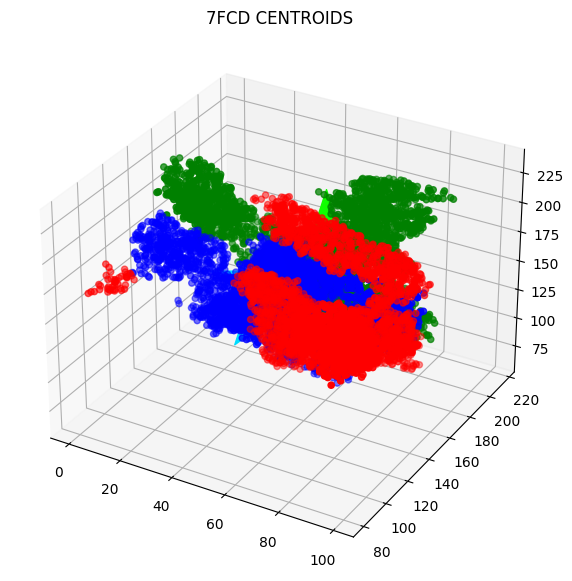

In [ ]:

_7fcd=readPDB() #Abrir archivo PDB
chains=getChainsCoords(_7fcd)   #Obtener cadenas
#Calcular centoides por cada cadena
centroids=[[centroid for centroid in calcCentroids(chain[0],chain[1],chain[2])] for chain in chains]
#Imprimir centroides
for centroid in centroids:
  print(centroid)
graficar(chains,centroids,3000)  #Graficar cadeas con sus centroides
